## Part 1 Load Sample Datasets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
%cd ./AutoSVD++

/content/drive/MyDrive/AutoSVD++


In [4]:
!pip install result

Use functions in utils/LoadDataSet.py to load the sample datasets. There are 4 datasets: set of users, set of businesses, training set of reviews, and testing set of reviews. These datasets are subsets of original Yelp's users, businesses, and reviews datasets. In this case, our sample datasets contains 5913 users, 28028 businesses, 195455 reviews in the training set, and 29565 reviews in the testing set.

In [5]:
from utils.LoadDataSet import LoadData

train_data, test_data = LoadData().loadSampleDataSet()

Number of users=5913; Number of items=28028


In [6]:
train_data.shape

(5913, 28028)

In [7]:
test_data.shape

(5913, 28028)

## Part 2 Feature Extraction (CAE)

Before training AutoSVD and AutoSVD++ models, run extract_item_features.py, which run functions in the custom CAE class in utils/ContractiveAutoEncoder.py, to extract item features for training the model. In the custom CAE class, we used PyTorch to train a custom ContractiveAutoEncoder model and then used this model to extract 10 features for each business.

In [8]:
!python extract_item_features.py

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
Epoch 1, Loss: 0.002357047749683261
Epoch 2, Loss: 0.0005376333720050752
Epoch 3, Loss: 0.0002411336317891255
Epoch 4, Loss: 0.0001762061147019267
Epoch 5, Loss: 0.00012726256682071835
Epoch 6, Loss: 0.00012292619794607162
Epoch 7, Loss: 0.000103607693745289
Epoch 8, Loss: 0.00010233154171146452
Epoch 9, Loss: 9.043107274919748e-05
Epoch 10, Loss: 9.165212395600975e-05
Epoch 11, Loss: 8.836150664137676e-05
Epoch 12, Loss: 8.602284651715308e-05
Epoch 13, Loss: 8.496822556480765e-05
Epoch 14, Loss: 8.276507287519053e-05
Epoch 15, Loss: 8.300752233481035e-05
Epoch 16, Loss: 8.336159226018935e-05
Epoch 17, Loss: 8.129449997795746e-05
Epoch 18, Loss: 8.059106767177582e-05
Epoch 19, Loss: 8.112278737826273e-05
Epoch 20, Loss: 

## Part 3 AutoSVD

Then, run main_AutoSVD.py which loads the train data and test data, defines and trains a AutoSVD model, and saves the model for inference later.

In [9]:
!python main_AutoSVD.py

Number of users=5913; Number of items=28028
[epoch=1] AutoSVD RMSE = 1.07765, AutoSVD MAE = 0.83380
[epoch=2] AutoSVD RMSE = 1.05222, AutoSVD MAE = 0.81898
[epoch=3] AutoSVD RMSE = 1.03980, AutoSVD MAE = 0.80967
[epoch=4] AutoSVD RMSE = 1.03334, AutoSVD MAE = 0.80357
[epoch=5] AutoSVD RMSE = 1.02985, AutoSVD MAE = 0.79951
[epoch=6] AutoSVD RMSE = 1.02792, AutoSVD MAE = 0.79673
[epoch=7] AutoSVD RMSE = 1.02685, AutoSVD MAE = 0.79478
[epoch=8] AutoSVD RMSE = 1.02628, AutoSVD MAE = 0.79346
[epoch=9] AutoSVD RMSE = 1.02601, AutoSVD MAE = 0.79255
[epoch=10] AutoSVD RMSE = 1.02594, AutoSVD MAE = 0.79191
[epoch=11] AutoSVD RMSE = 1.02601, AutoSVD MAE = 0.79148
[epoch=12] AutoSVD RMSE = 1.02616, AutoSVD MAE = 0.79121
[epoch=13] AutoSVD RMSE = 1.02640, AutoSVD MAE = 0.79105
[epoch=14] AutoSVD RMSE = 1.02669, AutoSVD MAE = 0.79098
[epoch=15] AutoSVD RMSE = 1.02702, AutoSVD MAE = 0.79097
[epoch=16] AutoSVD RMSE = 1.02740, AutoSVD MAE = 0.79102
[epoch=17] AutoSVD RMSE = 1.02782, AutoSVD MAE = 0.79

In [11]:
import numpy as np

rmse = np.loadtxt("parameters/rmse.csv")
mae = np.loadtxt("parameters/mae.csv")

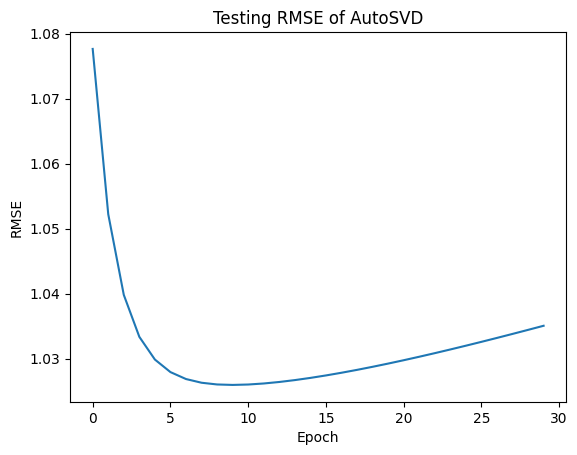

In [15]:
import matplotlib.pyplot as plt

# Plotting the NumPy array as a line plot
plt.plot(rmse)
plt.title('Testing RMSE of AutoSVD')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.show()

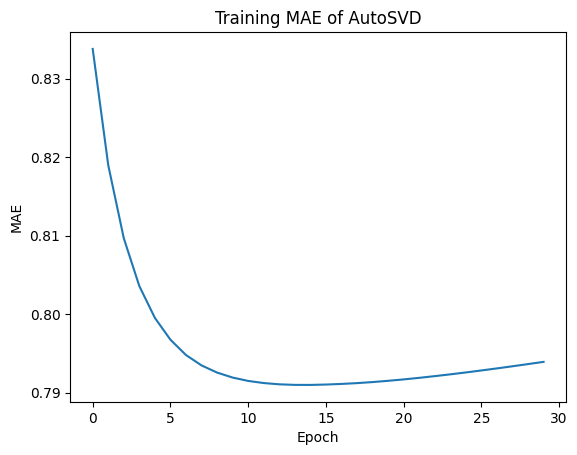

In [13]:
# Plotting the NumPy array as a line plot
plt.plot(mae)
plt.title('Testing MAE of AutoSVD')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()

## Part 4 AutoSVD++

Finally, run main_AutoSVDpp.py which loads the train data and test data, defines and trains a AutoSVDpp model, and saves the model for inference later.

In [14]:
!python main_AutoSVDpp.py

Number of users=5913; Number of items=28028
[epoch=1] AutoSVD++ RMSE = 1.09167, AutoSVD++ MAE = 0.84097
[epoch=2] AutoSVD++ RMSE = 1.06615, AutoSVD++ MAE = 0.82743
[epoch=3] AutoSVD++ RMSE = 1.05099, AutoSVD++ MAE = 0.81802
[epoch=4] AutoSVD++ RMSE = 1.04168, AutoSVD++ MAE = 0.81105
[epoch=5] AutoSVD++ RMSE = 1.03585, AutoSVD++ MAE = 0.80582
[epoch=6] AutoSVD++ RMSE = 1.03215, AutoSVD++ MAE = 0.80192
[epoch=7] AutoSVD++ RMSE = 1.02980, AutoSVD++ MAE = 0.79898
[epoch=8] AutoSVD++ RMSE = 1.02832, AutoSVD++ MAE = 0.79675
[epoch=9] AutoSVD++ RMSE = 1.02740, AutoSVD++ MAE = 0.79504
[epoch=10] AutoSVD++ RMSE = 1.02687, AutoSVD++ MAE = 0.79378
[epoch=11] AutoSVD++ RMSE = 1.02659, AutoSVD++ MAE = 0.79285
[epoch=12] AutoSVD++ RMSE = 1.02649, AutoSVD++ MAE = 0.79218
[epoch=13] AutoSVD++ RMSE = 1.02651, AutoSVD++ MAE = 0.79168
[epoch=14] AutoSVD++ RMSE = 1.02662, AutoSVD++ MAE = 0.79134
[epoch=15] AutoSVD++ RMSE = 1.02680, AutoSVD++ MAE = 0.79112
[epoch=16] AutoSVD++ RMSE = 1.02703, AutoSVD++ MAE

In [16]:
import numpy as np

rmse = np.loadtxt("parameters/rmse_pp.csv")
mae = np.loadtxt("parameters/mae_pp.csv")

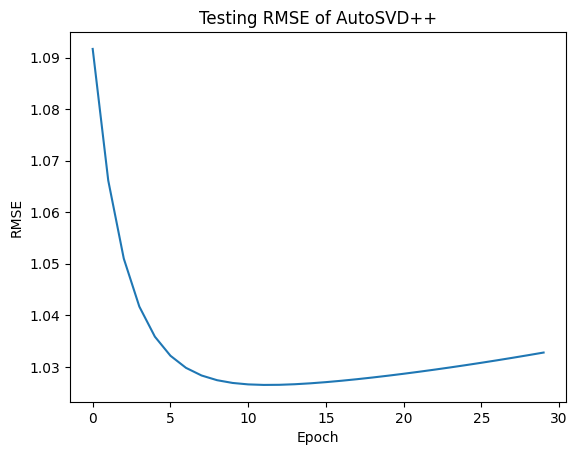

In [17]:
import matplotlib.pyplot as plt

# Plotting the NumPy array as a line plot
plt.plot(rmse)
plt.title('Testing RMSE of AutoSVD++')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.show()

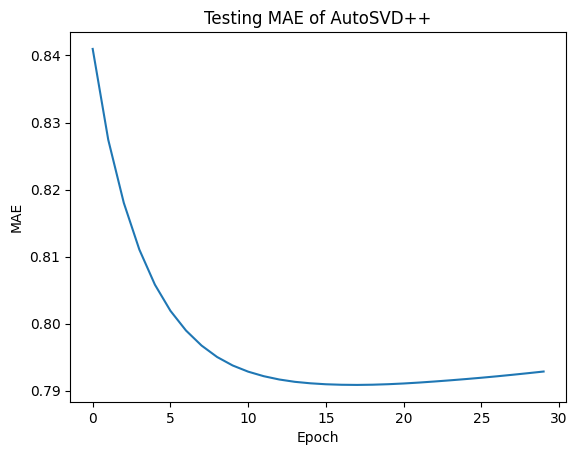

In [18]:
# Plotting the NumPy array as a line plot
plt.plot(mae)
plt.title('Testing MAE of AutoSVD++')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()

Plot the testing RMSE and MAE of AutoSVD and AutoSVD++ in one figure for comparison

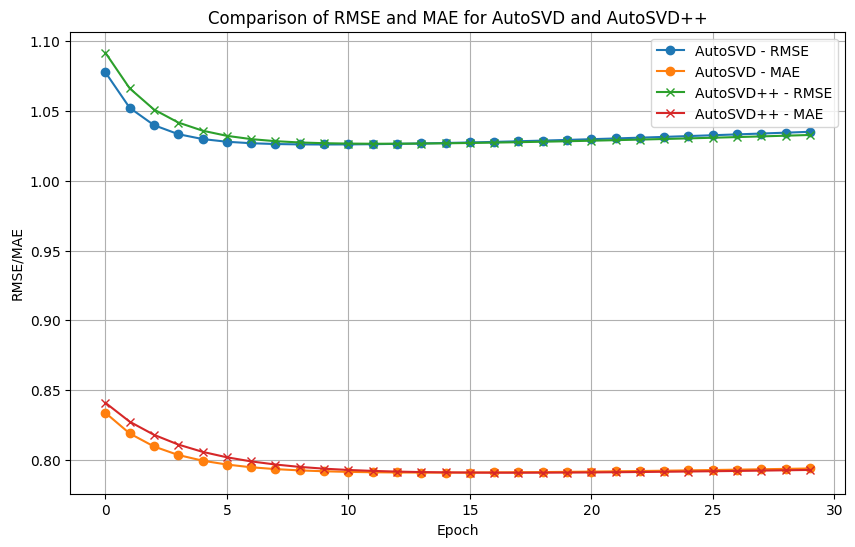

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV files
rmse = np.loadtxt("parameters/rmse.csv")
mae = np.loadtxt("parameters/mae.csv")
rmse_pp = np.loadtxt("parameters/rmse_pp.csv")
mae_pp = np.loadtxt("parameters/mae_pp.csv")

# Plotting the data
plt.figure(figsize=(10, 6))

# Assuming 'Epoch' is your x-axis and 'Value' is your y-axis
plt.plot(rmse, label='AutoSVD - RMSE', marker='o')
plt.plot(mae, label='AutoSVD - MAE', marker='o')
plt.plot(rmse_pp, label='AutoSVD++ - RMSE', marker='x')
plt.plot(mae_pp, label='AutoSVD++ - MAE', marker='x')

plt.xlabel('Epoch')
plt.ylabel('RMSE/MAE')
plt.title('Comparison of RMSE and MAE for AutoSVD and AutoSVD++')
plt.legend()
plt.grid(True)
plt.show()

Both RMSE and MAE of AutoSVD and AutoSVD++ are very similar, which suggests that implicit feedback does not have a great impact on Yelp restaurant recommendation. For few initial epoches, AutoSVD achieves slightly lower RMSE and MAE than AutoSVD++, but in later epoches, AutoSVD++ tends to have a slightly smaller RMSE and MAE.